In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r"C:\Users\manis\3D Objects\zomato.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          23193 non-null  object
 1   address                      23193 non-null  object
 2   name                         23193 non-null  object
 3   online_order                 23193 non-null  object
 4   book_table                   23193 non-null  object
 5   rate                         23193 non-null  object
 6   votes                        23193 non-null  int64 
 7   phone                        23193 non-null  object
 8   location                     23193 non-null  object
 9   rest_type                    23193 non-null  object
 10  dish_liked                   23193 non-null  object
 11  cuisines                     23193 non-null  object
 12  approx_cost(for two people)  23193 non-null  object
 13  reviews_list                 23193 n

In [9]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [10]:
pd.isnull(df)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51707,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51708,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51711,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
df.shape

(23193, 17)

In [16]:
###  Extra numeric part of rating  (e.g., "4.5/5" -> "4.5")
df['rate']=df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
# Convert to numeric (ensures that the column is float)
df['rate']=pd.to_numeric(df['rate'])
## fill missng rating with mean
df['rate'].fillna(df['rate'].mean(),inplace=True)
df.info()
# Convert cost column to numeric
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str).str.replace(',', '').astype(float)

C:\Users\manis\AppData\Local\Temp\ipykernel_8740\3711469658.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(),inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23193 non-null  object 
 1   address                      23193 non-null  object 
 2   name                         23193 non-null  object 
 3   online_order                 23193 non-null  object 
 4   book_table                   23193 non-null  object 
 5   rate                         23193 non-null  float64
 6   votes                        23193 non-null  int64  
 7   phone                        23193 non-null  object 
 8   location                     23193 non-null  object 
 9   rest_type                    23193 non-null  object 
 10  dish_liked                   23193 non-null  object 
 11  cuisines                     23193 non-null  object 
 12  approx_cost(for two people)  23193 non-null  object 
 13  reviews_list         

In [14]:
# print(df)

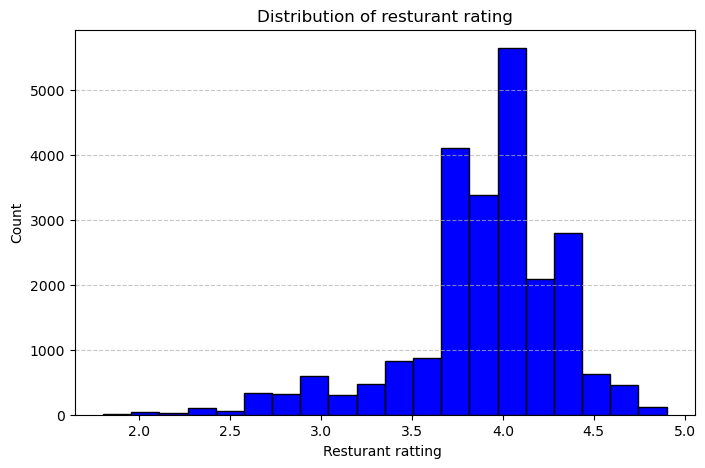

In [26]:
##1. Distribution of Restaurant Ratings (Histogram)
plt.figure(figsize=(8,5))
plt.hist(df['rate'].dropna(),bins=20,color='blue',edgecolor='black')
plt.xlabel("Resturant ratting ")
plt.ylabel("Count")
plt.title("Distribution of resturant rating")
plt.grid(axis='y',linestyle="--",alpha=0.7)
plt.show()


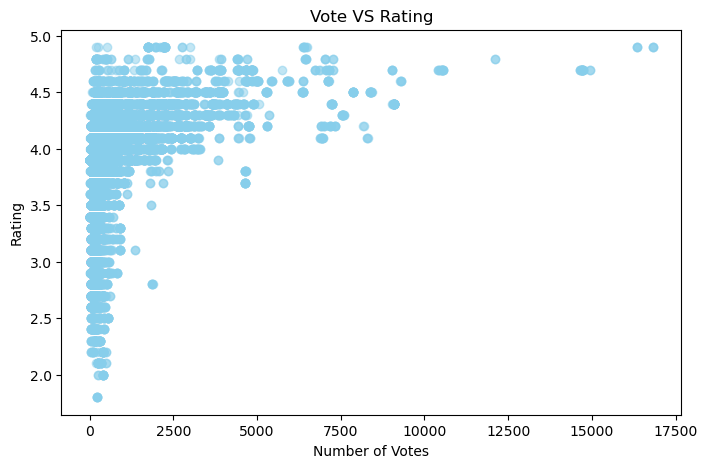

In [34]:
### 2. Scatter Plot: Number of Votes vs Ratings
plt.figure(figsize=(8,5))
plt.scatter(df["votes"],df["rate"],alpha=0.5,color="skyblue")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.title("Vote VS Rating")
plt.show()

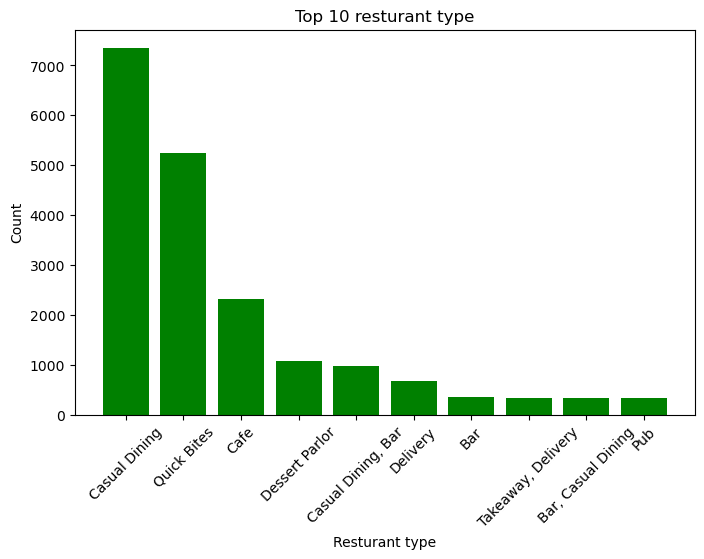

In [40]:
## 3. Bar Chart: Most Common Restaurant Types
plt.figure(figsize=(8,5))
top_rest_type=df["rest_type"].value_counts().sort_values(ascending=False).head(10)
plt.bar(top_rest_type.index,top_rest_type.values,color="green")
plt.xlabel("Resturant type")
plt.ylabel("Count")
plt.title("Top 10 resturant type")
plt.xticks(rotation=45)
plt.show()

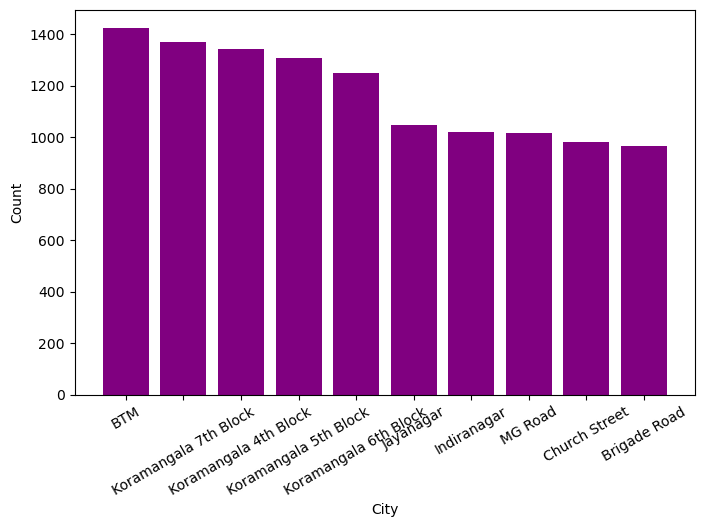

In [52]:
### 4. Bar Chart: Restaurants per City
plt.figure(figsize=(8,5))
city_counts=df["listed_in(city)"].value_counts()
plt.bar(city_counts.index[:10],city_counts.values[:10],color="purple")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=390)
plt.show()


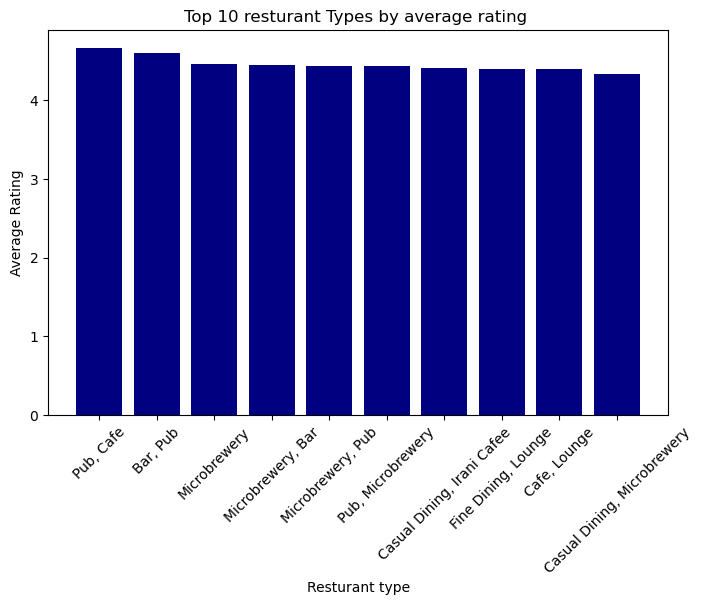

In [60]:
### 5. Bar Chart: Average Ratings Across Restaurant Types
plt.figure(figsize=(8,5))
avg_rating=df.groupby("rest_type")["rate"].mean().sort_values(ascending=False).head(10)
plt.bar(avg_rating.index,avg_rating.values,color="navy")
plt.xlabel("Resturant type")
plt.ylabel("Average Rating")
plt.title("Top 10 resturant Types by average rating ")
plt.xticks(rotation=(45))
plt.show()

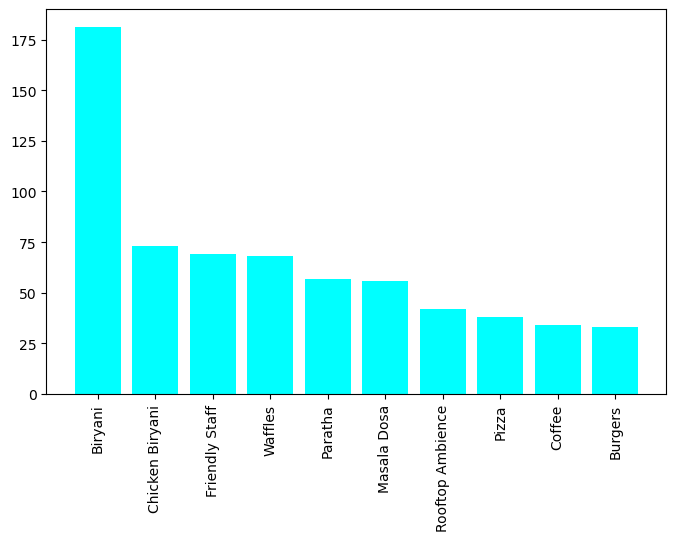

In [80]:
### 6. Bar Chart: Top 10 Liked Dishes
plt.figure(figsize=(8,5))
top_dishes=df["dish_liked"].value_counts().sort_values(ascending=False).head(10)
plt.bar(top_dishes.index,top_dishes.values,color="cyan")
plt.xticks(rotation=90)
plt.show()


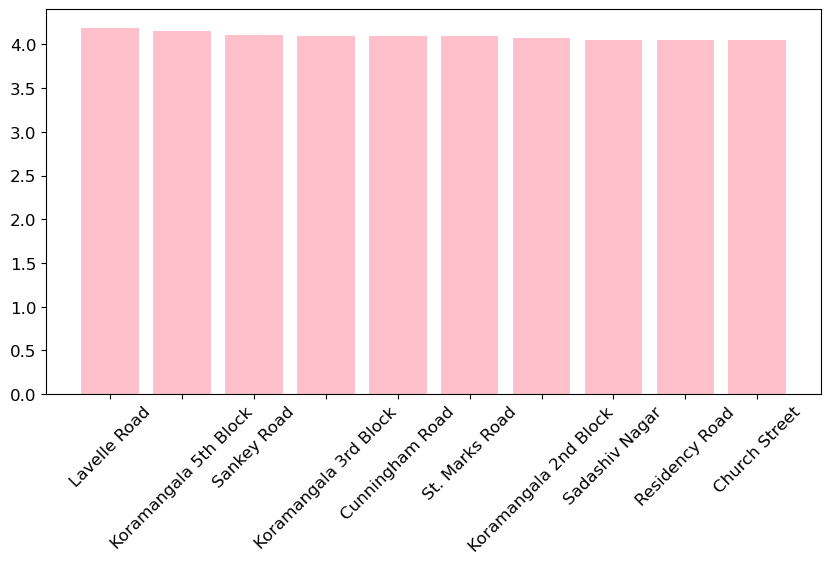

In [198]:
### 7.  Bar Chart: Top Locations with Highest Rated Restaurants
plt.figure(figsize=(10,5))
top_location=df.groupby("location")["rate"].mean().sort_values(ascending=False).head(10)
plt.bar(top_location.index,top_location.values,color="pink")
plt.xticks(rotation=45)
plt.show()

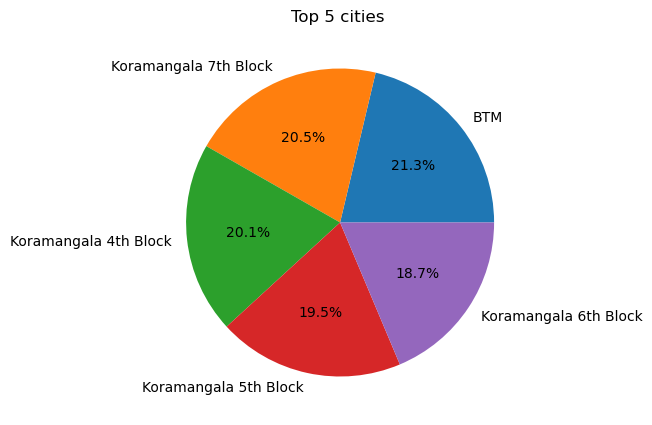

In [92]:
### 8.  Pie Chart: Restaurant Density by City
plt.figure(figsize=(10,5))
city_counts[:5].plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("")
plt.title("Top 5 cities ")
plt.show()

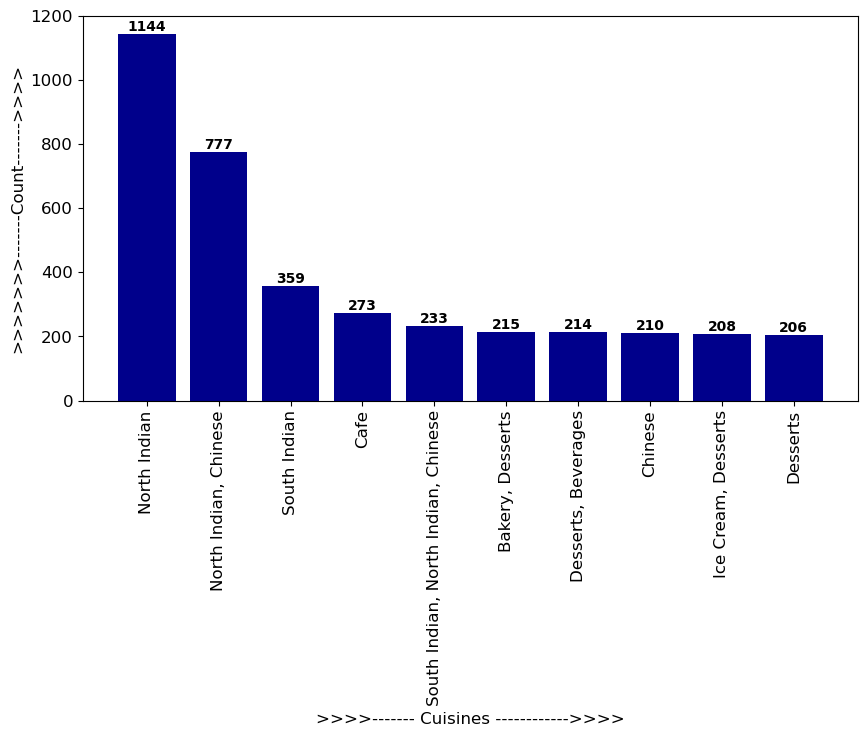

In [200]:
#### 9.  Bar Chart: Top 10 Most Popular Cuisines
plt.figure(figsize=(10,5))
top_Cuisines=df["cuisines"].value_counts().sort_values(ascending=False).head(10)
plt.bar(top_Cuisines.index,top_Cuisines.values, color="darkblue")
plt.rcParams.update({'font.size': 12})  ## we can use increase font size in matplotlib using this function 
plt.xlabel(">>>>------- Cuisines ------------>>>>")
plt.ylabel(">>>>>>>-------Count------->>>>")
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.show()

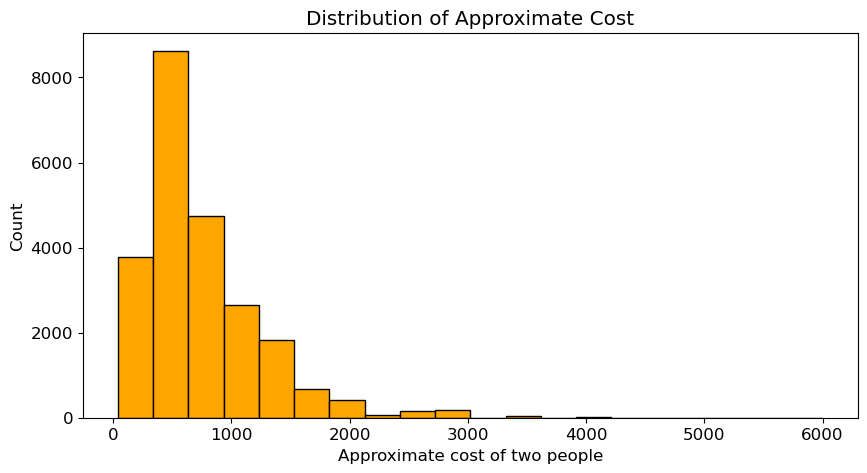

In [212]:
###  10.  Histogram: Distribution of Approximate Cost
plt.figure(figsize=(10,5))
plt.hist(df["approx_cost(for two people)"].dropna(),bins=20,color="orange",edgecolor="black")
plt.xlabel("Approximate cost of two people")
plt.ylabel("Count")
plt.title("Distribution of Approximate Cost")
plt.show()

<Figure size 1000x500 with 0 Axes>

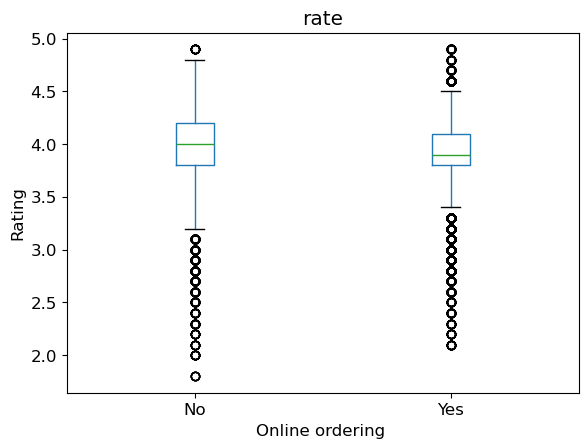

In [220]:
### 11.   Online Ordering vs Ratings
plt.figure(figsize=(10,5))
df.boxplot(column="rate",by="online_order",grid=False)
plt.xlabel("Online ordering ")
plt.ylabel("Rating")
plt.suptitle("")

plt.show()